# 0. Package for homework

In [12]:
library(tidyverse)
library(IRdisplay)
library(gridExtra)

In [5]:
setwd("C:\\Users\\lee\\Desktop\\고급시계열 분석\\8주차")

# 8.1

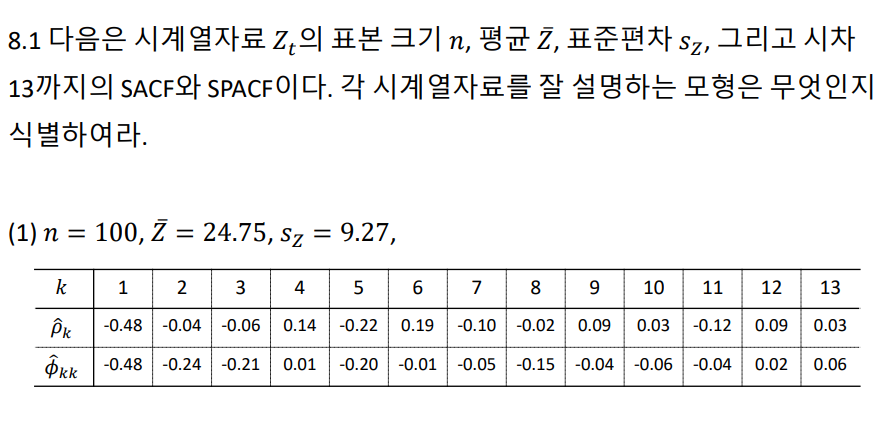

In [6]:
display_png(file="과제1.png",width=700,height=200)

## Solution

In [40]:
n <- 100
z_bar <- 24.75
S_z <- 9.27

k <- 1:13 ## lag
acf_k <- c(-0.48, -0.04, -0.06, 0.14, -0.22, 0.19, -0.10, -0.02, 0.09, 0.03, -0.12, 0.09, 0.03)
pacf_k <- c(-0.48, -0.24, -0.21, 0.01, -0.20, -0.01, -0.05, -0.15, -0.04,-0.06, -0.04, 0.02, 0.06)
value <- c(acf_k,pacf_k)

In [54]:
z_bar/(S_z/sqrt(n));
abs(qt(0.05,99)) ## 귀무가설을 기각

[1] 26.69903

[1] 1.660391

In [41]:
reject_acf <- 2*sqrt(1/n)
for (i in 2:13)
{
  reject_acf[i] <- 2*sqrt((1/n)*(1+cumsum(2*acf_k[i-1]^2)))
}

reject_pacf <- 2/sqrt(n)

In [42]:
data <- tibble(lag = rep(k,2),
               value = value,
               label = as.factor(rep(c("acf","pacf"),each=13)))

In [44]:
g2  <- data %>% filter(label %in% "pacf") %>% 
          ggplot(aes(x=lag,y=value)) +
          geom_point(stat="identity",alpha=0.5) + 
          coord_cartesian(xlim=c(1,13),ylim=c(-1,1)) +
          theme_bw() +
          ggtitle("PACF") +
          theme(plot.title = element_text(family = "serif", face = "bold", 
                                          hjust = 0.5, size = 20, color = "darkblue"),
                axis.title.y = element_blank()) +
          geom_hline(yintercept = reject_pacf,color="red",linetype="dashed",size=2) +
          geom_hline(yintercept = -reject_pacf,color="red",linetype="dashed",size=2)
g1 <- data %>% filter(label %in% "acf") %>% 
  ggplot(aes(x=lag,y=value)) +
  geom_point(stat="identity",alpha=0.5) + 
  coord_cartesian(xlim=c(1,13),ylim=c(-1,1)) +
  theme_bw() +
  ggtitle("ACF of Lag") +
  theme(
    plot.title = element_text(family = "serif", face = "bold", 
                              hjust = 0.5, size = 20, color = "darkblue")
    ,
    axis.title.y = element_blank()) +
  geom_line(aes(x=k,y=reject_acf),color="red",size=2,linetype="dashed") +
  geom_line(aes(x=k,y=-reject_acf),color="red",size=2,linetype="dashed")

In [45]:
options(repr.plot.res=200, repr.plot.width=10,reprt.plot.height=5)

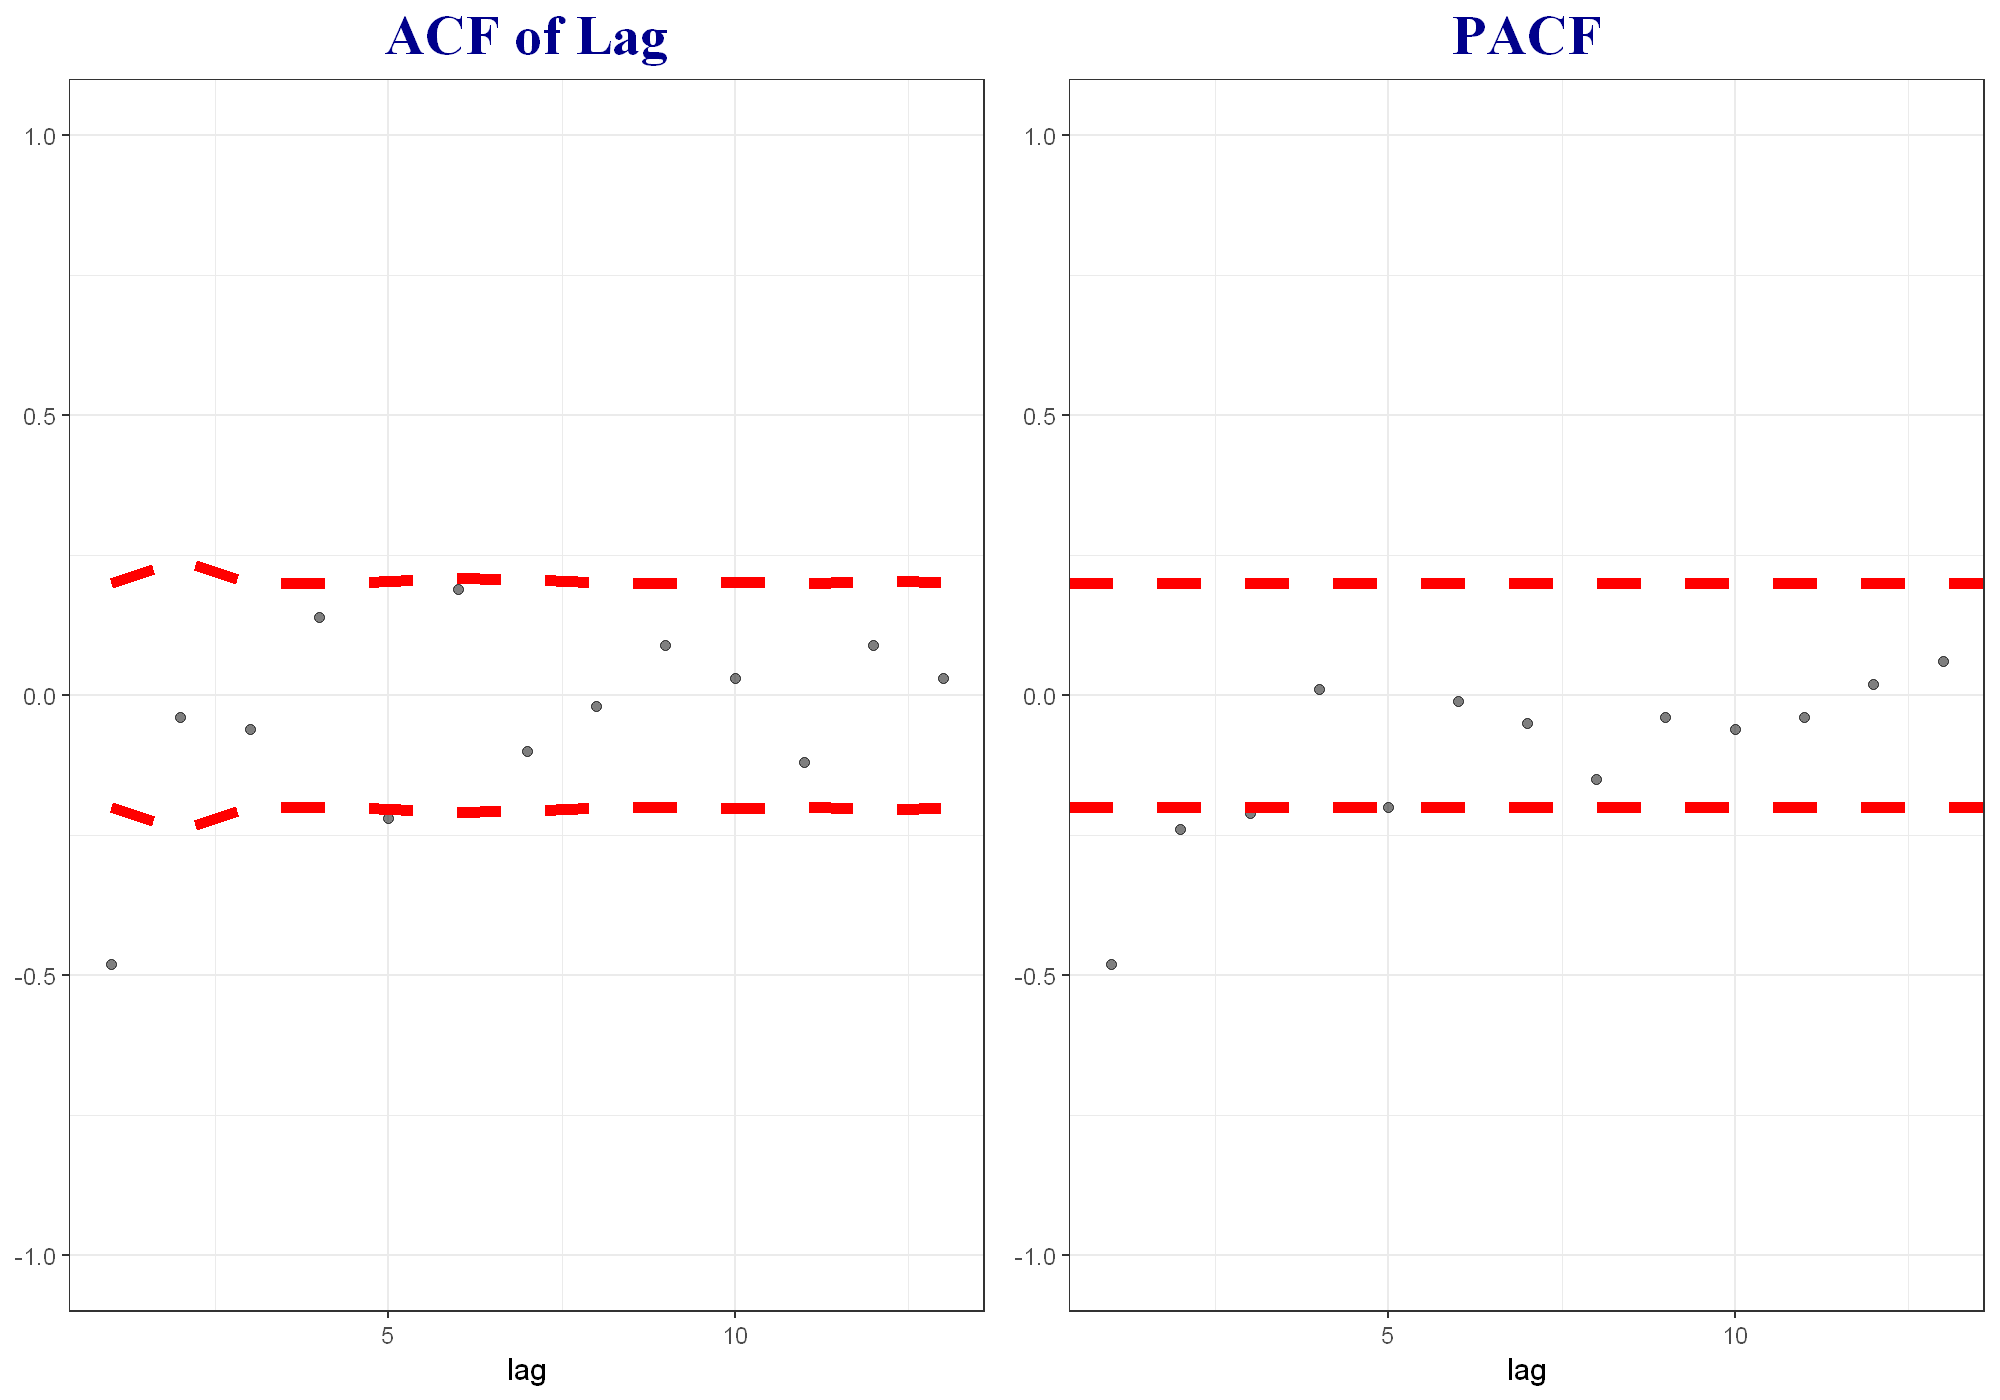

In [46]:
grid.arrange(g1,g2,ncol=2)

* 위 그림은 첫 번째 시차 부터 생성한 그림이다.

*  ACF 값을 살펴본 결과 1시차 이후 부터는 값들이 기각역안에 존재한다.

* PACF값을 살펴본 결과 2시차 이후부터 기각역안에 존재한다.

* 또한 두 그래프 모두 천천히 감소하는 경우는 없어 차분이 필요하다고 생각되진 않는다.

* 상수항 포함 여부 검정결과 또한 $H_0: \delta =0$을 기각한다.

 * 좀 더 단순한 모형을 고른다면 상수항이 포함된 $MA(1)$ 모형을 선정하겠다.

***

# 8-2.

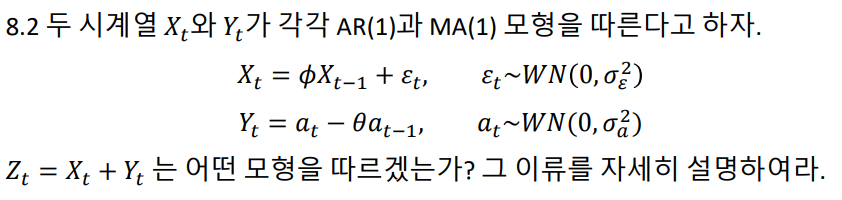

In [55]:
display_png(file="과제2.png",width=700,height=200)

## Solution

$\varepsilon_t + a_t = \delta_t \sim WN(0,\sigma^2_{\varepsilon} + \sigma^2_a )$이며 $\theta_1+\theta_2 <1, \theta_2-\theta_1<1, -1<\theta_2<1$

$$\begin{eqnarray*}(1-\phi B)=\Phi(B) Z_t &=& \Theta(B)(X_t + Y_t) \\ \\
                               &=& \varepsilon_t + \Phi(B)\,Y_t \\ \\ 
                               &=& \varepsilon_t + \Phi(B)\,\Theta(B)\,a_t \\ \\ 
                               &=&  (\varepsilon_t + a_t) - (\theta+\phi)Ba_t +\phi\theta B^2a_t \\ \\
                               &=&  (\varepsilon_t + a_t) \left[ 1- \frac {(\theta +\phi)a_t}{\varepsilon_t+a_t}\times B + \frac{\phi\theta a_t}{\varepsilon_t+a_t} \times B^2  \right ]       \\ \\
                              &=&  (\varepsilon_t + a_t) (1-\theta_1B -\theta_2B^2) \\ \\
                              &=& \delta_t  (1-\theta_1B -\theta_2B^2) \\ \\ 
                              &=& \Theta(B)\delta_t 
                             \end{eqnarray*}$$

* 위의 형태는 $ARMA(1,2)$의 형태이므로 $Z_t\sim ARMA(1,2)$이다.